## Proyect-Kaggle-Competition 💎

`d`: only for test & sample submission files, id for prediction sample identification

`price`: price in USD

`carat`: weight of the diamond

`cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color`: diamond colour

`clarity`: a measurement of how clear the diamond is

`x`: length in mm

`y`: width in mm

`z`: depth in mm

`depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

`table`: width of top of diamond relative to widest point (43--95)

### Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

#Plot
import matplotlib.pyplot as plt

#Statsmodels
import statsmodels.formula.api as smf

#Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#Split
from sklearn.model_selection import train_test_split

#Linear
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor

#Ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Neighbors
from sklearn.neighbors import KNeighborsRegressor


### Download the dataset

In [2]:
!kaggle competitions download -c diamonds-datamad0321

diamonds-datamad0321.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!tar -xzvf diamonds-datamad0321.zip

x sample_submission.csv
x test.csv
x train.csv


In [4]:
!rm -rf pfizer-vaccine-tweets.zip

In [5]:
!ls

Kaggle_competition-Copy1.ipynb model_1.csv
Kaggle_competition.ipynb       sample_submission.csv
README.md                      test.csv
diamonds-datamad0321.zip       train.csv
model.csv


### 0. Explore the dataset

In [6]:
df_test = pd.read_csv('data/test.csv',encoding = "ISO-8859-1")
df_train = pd.read_csv('data/train.csv',encoding = "ISO-8859-1")

In [5]:
df_test.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [4]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


### 1. Correlation between variables

In [7]:
corrMatrix=df_train[['carat','depth','table','x','y','z','price']].corr()

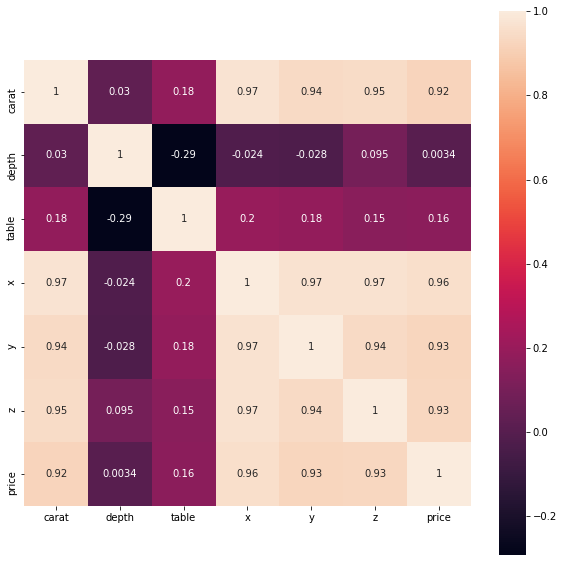

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corrMatrix, square=True,annot=True)

In [9]:
corrMatrix=df_test[['carat','depth','table','x','y','z']].corr()

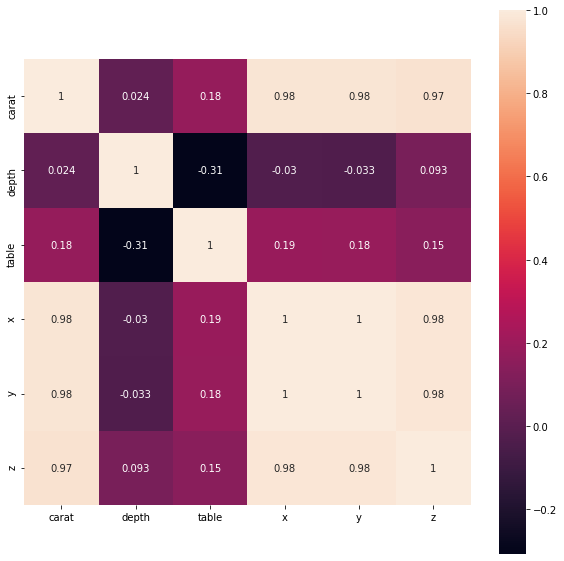

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corrMatrix, square=True,annot=True)

In [32]:
results = smf.ols("price ~ carat + depth + table + x + y + z", data = df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 8.116e+04
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        17:59:18   Log-Likelihood:                -6125.0
No. Observations:               40455   AIC:                         1.226e+04
Df Residuals:                   40448   BIC:                         1.232e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9189      0.095      9.623      0.000       0.732       1.106
carat         -0.6642      0.014    -48.967      0.000      -0.691      -0.638
depth          0.0230      0.001     19.754      0.000       0.021       0.025
table         -0.0101      0.001    -15.105      0.000      -0.011      -0.009
x              1.0791      0.009    123.984      0.000       1.062       1.096
y              0.0362      0.005      7.499      0.000       0.027       0.046
z              0.0469      0.009      5.385      0.000       0.030       0.064
==============================================================================
Omnibus:                    39148.053   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21477594.704
Skew:                           3.875   Prob(JB):                         0.00
Kurtosis:                     115.612   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The model explains 92% of the variable in price
- Coef is the measurement of how change in that variable affects the price (in this case, x have a positive coef and the change is greater than the others)

### 2. Handle Remaining Categorical Data & Convert to Ordinal

#### 2.1 CUT

In [11]:
df_test.cut.unique()

array(['Ideal', 'Good', 'Premium', 'Very Good', 'Fair'], dtype=object)

In [12]:
df_test['cut'] = df_test['cut'].replace(['Premium'],'Ideal')

In [13]:
df_train.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [14]:
df_train['cut'] = df_train['cut'].replace(['Premium'],'Ideal')

In [15]:
dic_for_cut = { "Fair": 1,
                "Good": 2,
                "Very Good": 3,
                "Ideal":4,
}

In [16]:
df_test.cut = df_test.cut.map(dic_for_cut)

In [17]:
df_train.cut = df_train.cut.map(dic_for_cut)

#### 2.2 Color

In [18]:
df_test.color.unique()

array(['H', 'D', 'F', 'E', 'G', 'I', 'J'], dtype=object)

In [19]:
df_train.color.unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

In [20]:
dic_for_color = { "D": 7,
                "E": 6,
                "F": 5,
                "G":4,
                "H": 3,
                "I": 2,
                "J":1,
}

In [21]:
df_test.color = df_test.color.map(dic_for_color)

In [22]:
df_train.color = df_train.color.map(dic_for_color)

#### 2.3 Clarity

In [23]:
df_train.clarity.unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [24]:
dic_for_clarity = { "IF": 8,
                "VVS1": 7,
                "VVS2": 6,
                "VS1": 5,
                "VS2": 4,
                "SI1": 3,
                "SI2":2,
                "I1": 1,
}

In [25]:
df_test.clarity = df_test.clarity.map(dic_for_clarity)

In [26]:
df_train.clarity = df_train.clarity.map(dic_for_clarity)

### 3. Assign and split the variables

In [27]:
X = df_train.drop("price", axis=1)
y = df_train["price"]
df_testX = df_test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=666)

## Models

### 1. Linear Regression

#### Train the model, make predictions and calculate the RMSE

In [29]:
lr = LinearRegression()

lr.fit(X=X_train, y=y_train)

y_pred_lr=lr.predict(X_test)

lrreg_rmse = mean_squared_error(y_test, y_pred_lr)
print(f"The RMSE of the LinearRegression model is {lrreg_rmse}")

The RMSE of the LinearRegression model is 0.030057553173125456


#### Train the test 

In [30]:
model=lr.fit(X, y)

In [31]:
price = model.predict(df_test)

In [32]:
df_test['price'] = price

### 2. Ridge, Lasso, SGDRegressor, KNeighborsRegressor, GradientBoostingRegressor

#### Train the model

In [33]:
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor()
}

In [34]:
for name, model in models.items():
    print(f"Training the model: {name}")
    model.fit(X=X_train,y=y_train)
    print(f"Finish 🥳")

Training the model: ridge
Finish 🥳
Training the model: lasso
Finish 🥳
Training the model: sgd
Finish 🥳
Training the model: knn
Finish 🥳
Training the model: gradient
Finish 🥳


In [35]:
for name, model in models.items():
    y_pred_models = model.predict(X_test)
    print(f"{name}")
    print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_models))
    print("MSE: ", metrics.mean_squared_error(y_test, y_pred_models))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_models)))
    print("R2: ", metrics.r2_score(y_test, y_pred_models))
    print("\n")

ridge
MAE:  0.12140961161918443
MSE:  0.03007042287869806
RMSE:  0.17340825493239376
R2:  0.9708370369102355


lasso
MAE:  0.8055747676921582
MSE:  0.872505878831829
RMSE:  0.9340802314746999
R2:  0.15382444594750333


sgd
MAE:  5.058619128099237e+16
MSE:  3.4182284252042224e+33
RMSE:  5.8465617461925624e+16
R2:  -3.315073745345704e+33


knn
MAE:  0.7664810283030528
MSE:  0.8642087598764059
RMSE:  0.9296282912414003
R2:  0.16187117594609612


gradient
MAE:  0.08212926647416617
MSE:  0.011349688334498311
RMSE:  0.10653491603459549
R2:  0.9889928205095586




#### Train the test

In [ ]:
Gr=GradientBoostingRegressor()

model_1 = Gr.fit(X, y)

y_pred_gr = model_1.predict(df_test)

In [ ]:
grreg_rmse = metrics.mean_squared_error(y_test, y_pred_gr)
print(f"The RMSE of the GradientBoostingRegressor model is {grreg_rmse}")

### 3. RandomForest

#### Train the model

In [29]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rfreg_rmse = mean_squared_error(y_test, y_pred_rf)

print(f"The RMSE of the RandomForestRegressor model is {rfreg_rmse}")

The RMSE of the RandomForestRegressor model is 0.007953500394549506


In [30]:
model_2=rf.fit(X, y)

price = model_2.predict(df_test)

df_test['price'] = price

In [ ]:
df_pred=df_test[['id','price']]

In [ ]:
df = df_pred.set_index("id")
df.shape

In [32]:
df.to_csv("models/model1.csv")